Predict1: Grades <br>
Predict2: Stress_Level <br>
Predict3: Gender - Stress_Level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/hdd/data/adp_data/student_lifestyle_dataset.csv'

df = pd.read_csv(data_path, index_col = 'Student_ID')
df.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
Student_ID,,,,,,,,
1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              2000 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   Stress_Level                     2000 non-null   object 
 6   Gender                           2000 non-null   object 
 7   Grades                           2000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 140.6+ KB


In [4]:
df.describe(include = 'object')

,Stress_Level,Gender
count,2000,2000
unique,3,2
top,High,Male
freq,1029,1016


In [5]:
df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,7.475800,1.990100,7.501250,2.704550,4.32830,7.789825
std,1.423888,1.155855,1.460949,1.688514,2.51411,0.746777
min,5.000000,0.000000,5.000000,0.000000,0.00000,5.600000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,7.250000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,7.780000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,8.320000
max,10.000000,4.000000,10.000000,6.000000,13.00000,10.000000


Stress_Level 순서 척도로 바꾸기  
<br>
<br>
측정 척도
- 명목 척도
- 순서 척도
- 등간 척도
- 비율 척도

In [6]:
stress_order = ['Low', 'Moderate', 'High']

df['Stress_Level'] = pd.Categorical(
    df['Stress_Level'],
    categories = stress_order,
    ordered = True
)
df['Gender'] = pd.Categorical(
    df['Gender']
)

df.describe(include = 'category')

,Stress_Level,Gender
count,2000,2000
unique,3,2
top,High,Male
freq,1029,1016


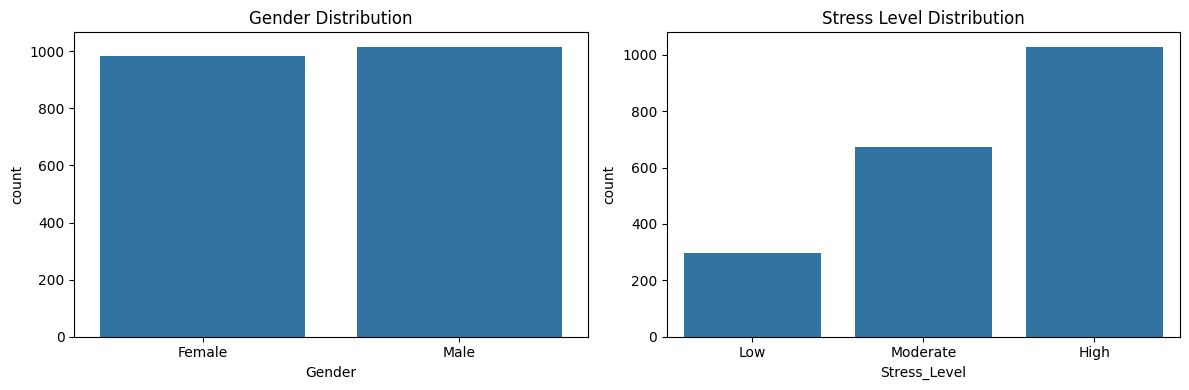

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.countplot(data = df, x = 'Gender', ax = axes[0])
axes[0].set_title('Gender Distribution')

sns.countplot(data = df, x = 'Stress_Level', ax = axes[1])
axes[1].set_title('Stress Level Distribution')

plt.tight_layout()
plt.show()

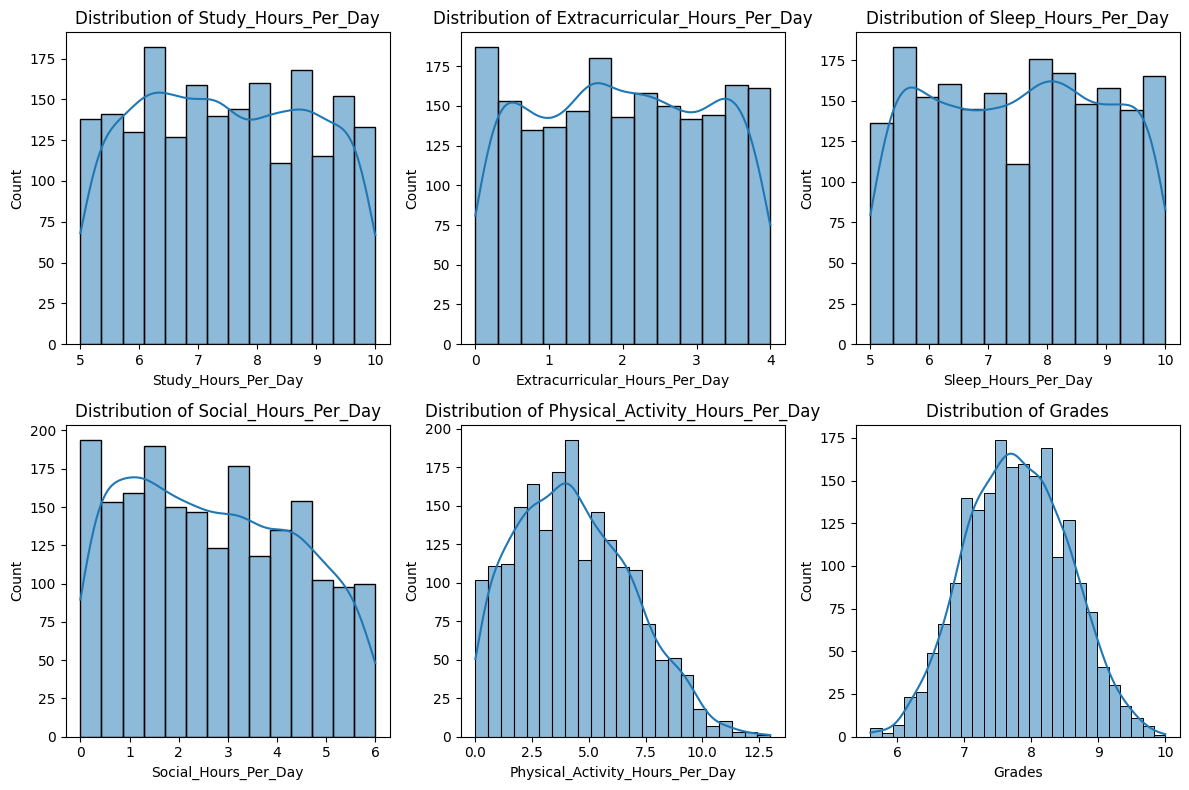

In [10]:
numeric_columns = df.select_dtypes(include = ['int64', 'float64']).columns

plt.figure(figsize = (12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde = True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

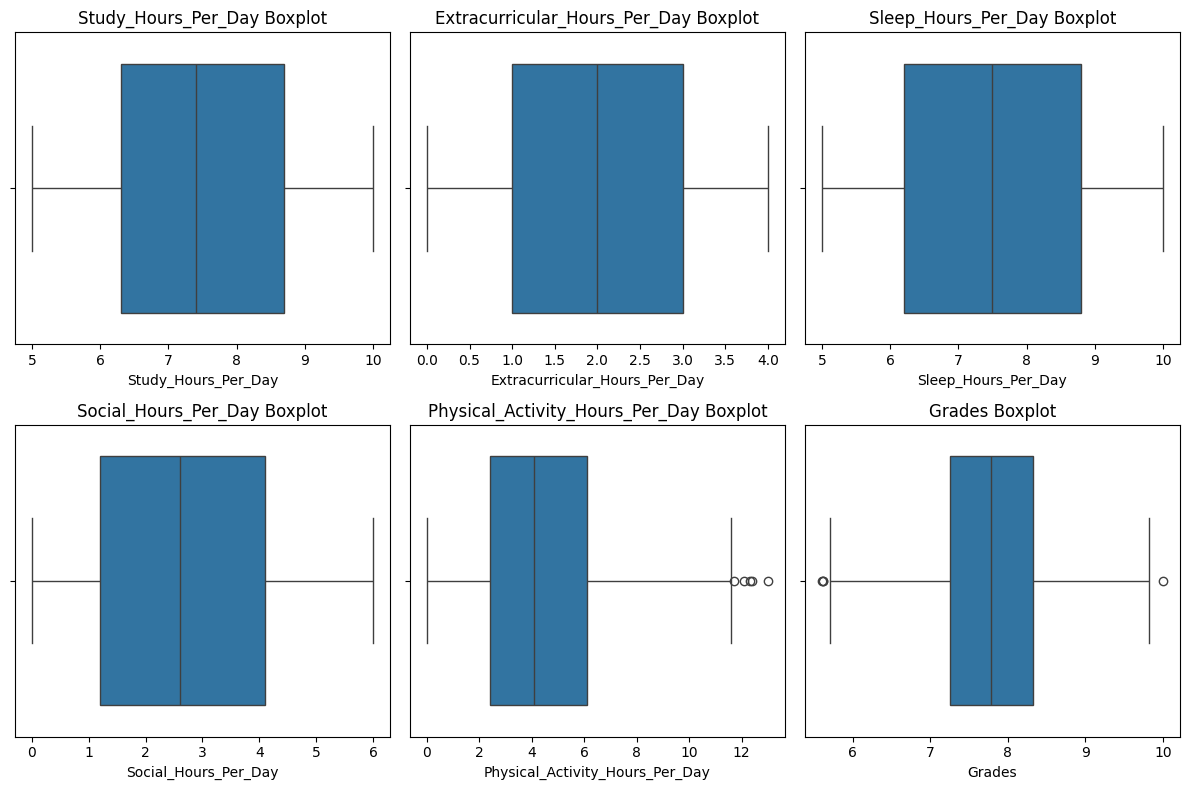

In [11]:
plt.figure(figsize = (12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data = df, x = col)
    plt.title(f'{col} Boxplot')

plt.tight_layout()
plt.show()

운동 시간과 성적에서 이상점이 있긴 하지만 분포를 확인해봤을 때는 크게 떨어진 값은 아니라고 판단해서 두 변수 모두 이상값을 삭제하지 않음.